In [1]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import numpy as np
import jax

(20, 5) (20, 5)
(20, 5) (20, 5)


|██████████| 100.0% ◆ elapsed 4.00s ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:16<00:00,  3.01it/s]


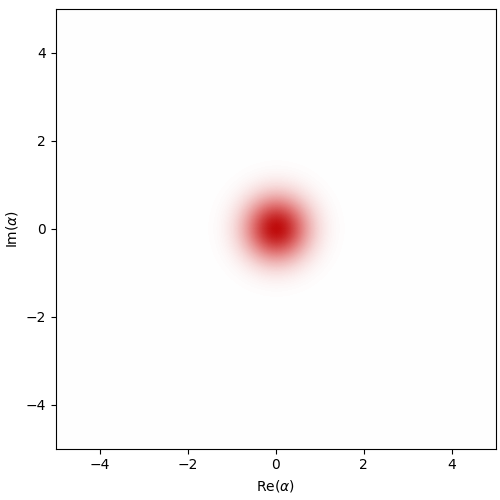

In [2]:
T = 4 # Time
g_2 = 1
e_d = -4
k_b = 10
na = 20 # Hilbert space dimension
nb = 5 # Hilbert space dimension
a = dq.destroy(na) # Annihilation operator
b = dq.destroy(nb) # Annihilation operator
a_dag = dq.create(na) # Creation operator
b_dag = dq.create(nb) # Creation operator
a_id, id = dq.destroy(na, nb)
id, id_bdag = dq.create(na, nb)
H_2ph = g_2 * dq.tensor(a_dag @ a_dag, b) + dq.dag(g_2* dq.tensor(a_dag @ a_dag, b))  # 2 photon exchange hamiltonian
H_d = dq.dag(e_d * id_bdag) + (e_d * id_bdag) # buffer drive hamiltonian
print(H_2ph.dims, H_d.dims)
H = H_2ph + H_d # System Hamiltonian

psi0 = dq.fock((na, nb), (0, 0)) # Vacuum state
kappa_2 = 1 # two-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, T, 100)
print((a_id @ a_id).dims, dq.eye(na, nb).dims)
loss_op = dq.asqarray(np.sqrt(k_b)*dq.dag(id_bdag), dims=(20,5)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0, (na, nb)))

Task 1.3: Performing a Zeno-gate

For part a, we simulated the time evolution that maps the even state to the odd state in time Tz.

From this paper: https://doi.org/10.1103/PRXQuantum.4.040316 we notice that the bosonic operators in the hamiltonian are nothing but the creation and annihilation operators!

From the GIF we can notice that we indeed transition from the even state to the odd state (the red band in the center changes to a blue one).

|██████████| 100.0% ◆ elapsed 2.60s ◆ remaining 0.00ms  
100%|██████████| 50/50 [01:22<00:00,  1.65s/it]


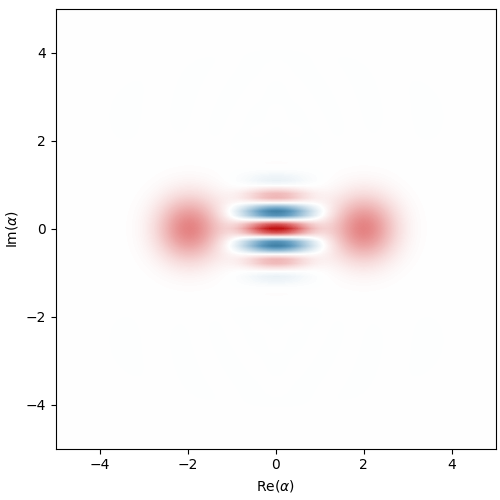

In [4]:
T_z = 4
e_z = 1 # Paramater characterizing the angle by which the state rotates about the z-axis

plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
minus = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))
k_a = 1 # single-photon loss rate
alpha = 2.0 # cat size
tsave = np.linspace(0, T_z, 100)
H_z = (e_z * a_dag) + dq.dag(e_z * a_dag) # Hamiltonian that performs a continuous rotation around the Z-axis of the qubit
loss_op = dq.asqarray(np.sqrt(k_a)*(a @ a - alpha**2 * dq.eye(na))) # loss operator
res = dq.mesolve(H_z, [loss_op], plus, tsave)
dq.plot.wigner_gif(res.states)
# plt.plot(tsave, dq.expect(dq.number(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number of photons in the memory mode vs time

We then made plots for the expectation value of the parity as a function of time where different colors represent different values of k_a. Each plot was made having a fixed value of e_z.

|██████████| 100.0% ◆ elapsed 8.39ms ◆ remaining 0.00ms
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
|██████████| 100.0% ◆ elapsed 83.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 8.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 13.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 4.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.37ms 

Text(0, 0.5, 'Expected Parity')

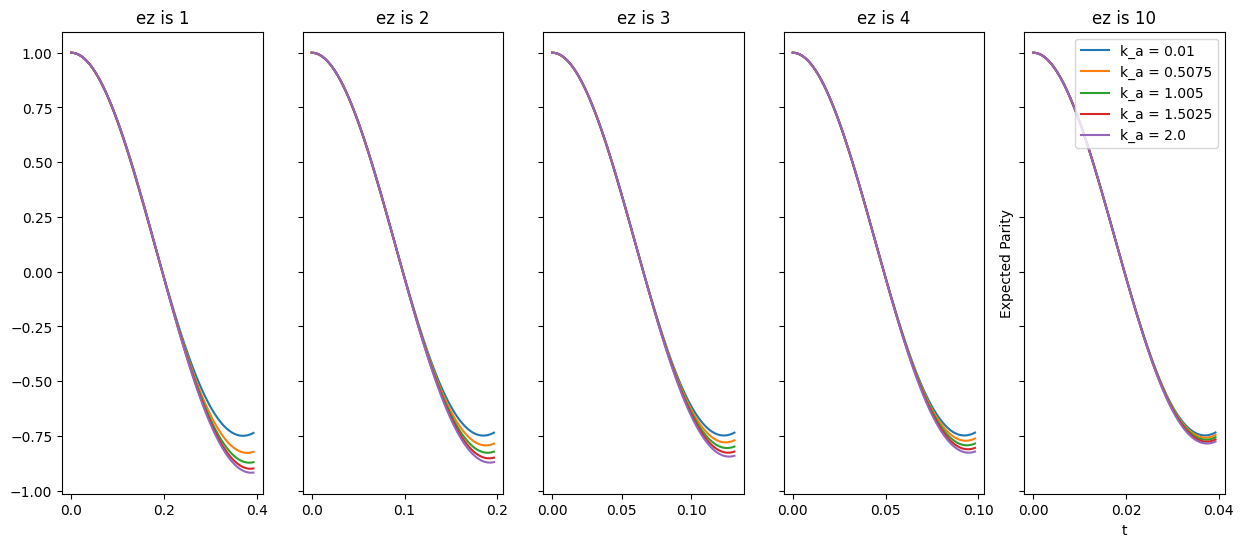

In [3]:
e_z = 1 # Paramater characterizing the angle by which the state rotates about the z-axis

plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
minus = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))
k_a = np.linspace(0.01, 2, num=5) # single-photon loss rate
e_zs = [1, 2, 3, 4, 10]
alpha = 2.0 # cat size
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 6))
i = 0
for ez in e_zs:
    for ka in k_a:
        T_z = np.pi/(8*ez)
        tsave = np.linspace(0, T_z, 100)
        H_z = (ez * a_dag) + dq.dag(ez * a_dag) # Hamiltonian that performs a continuous rotation around the Z-axis of the qubit
        loss_op = dq.asqarray(np.sqrt(ka)*(a @ a - alpha**2 * dq.eye(na))) # loss operator
        res = dq.mesolve(H_z, [loss_op], plus, tsave)
        #dq.plot.wigner_gif(res.states)
        # plt.plot(tsave, dq.expect(dq.number(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number of photons in the memory mode vs time
        axs[i].plot(tsave, dq.expect(dq.parity(na), res.states), label = f'k_a = {ka}') # Expectation value of number parity of photons vs time
        axs[i].set_title(f'ez is {ez}')
    i = i + 1

plt.legend()
#plt.title("Parity as a function of time for different single photon losses in mode a")
plt.xlabel("t")
plt.ylabel("Expected Parity")

Finally, we made a plot for the expectation value of parity as a function of time where different colors represent different values of e_z. This plot was made by taking a constant value of k_a (which was 1.5).

|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 237.14ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 122.59ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 16.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 8.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 5.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.54ms ◆ remaining 0.00ms


Text(0, 0.5, 'Expected Parity')

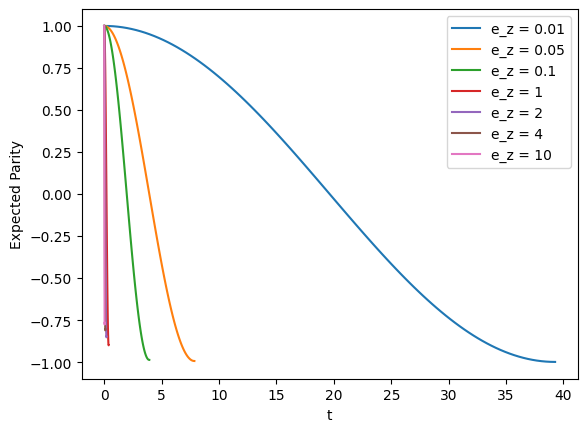

In [8]:
e_z = 1 # Paramater characterizing the angle by which the state rotates about the z-axis

plus = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
minus = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))
k_a = 1.5 # single-photon loss rate
e_zs = [0.01, 0.05, 0.1, 1, 2, 4, 10]
alpha = 2.0 # cat size
for ez in e_zs:
    T_z = np.pi/(8*ez)
    tsave = np.linspace(0, T_z, 100)
    H_z = (ez * a_dag) + dq.dag(ez * a_dag) # Hamiltonian that performs a continuous rotation around the Z-axis of the qubit
    loss_op = dq.asqarray(np.sqrt(k_a)*(a @ a - alpha**2 * dq.eye(na))) # loss operator
    res = dq.mesolve(H_z, [loss_op], plus, tsave)
    #dq.plot.wigner_gif(res.states)
    # plt.plot(tsave, dq.expect(dq.number(na), dq.ptrace(res.states, 0, (na, nb)))) # Expectation value of number of photons in the memory mode vs time
    plt.plot(tsave, dq.expect(dq.parity(na), res.states), label = f'e_z = {ez}') # Expectation value of number parity of photons vs time

plt.legend()
#plt.title("Parity as a function of time for different single photon losses in mode a")
plt.xlabel("t")
plt.ylabel("Expected Parity")